# Text mining

In [1]:
#importing pandas 
import pandas as pd

In [2]:
#reading elon musk tweet csv file using pandas
df=pd.read_csv('Elon_musk (1).csv',encoding='windows-1254')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
#droping the unnamed column as it is not usefull for further steps
df=df.drop('Unnamed: 0',axis=1)

In [4]:
#finding both null and datatype values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


# cleaning the Text 

In [5]:
#importing regular expression to perform cleaningin the text
import re
import string

#defineing the function to perform cleaning the unwanted things from text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

#calling the function
clean = lambda x: clean_text(x)


In [6]:
#applying the clean for overall dataset

df['Text'] = df.Text.apply(clean)
df.Text

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [7]:
from textblob import TextBlob
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

,Text,subjectivity,polarity
0,im an alien,0.750000,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,teslacn congratulations tesla china for amazin...,0.366667,0.275000
...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.508333,0.111111
1995,ppathole make sure to read ur terms amp condit...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb and dumber is,0.500000,-0.375000


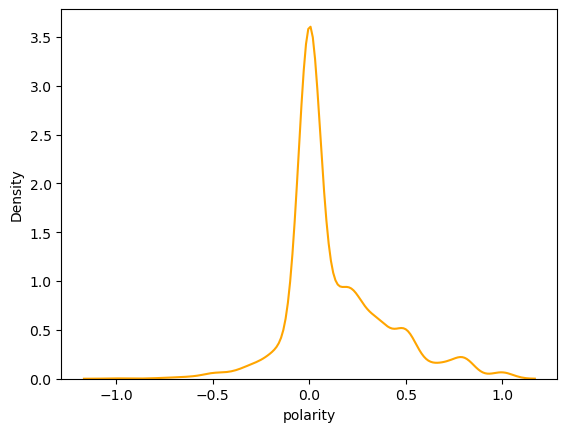

In [10]:
#ploting polarity and subjectivity
import seaborn as sns

sns.kdeplot(df.polarity,color='orange');

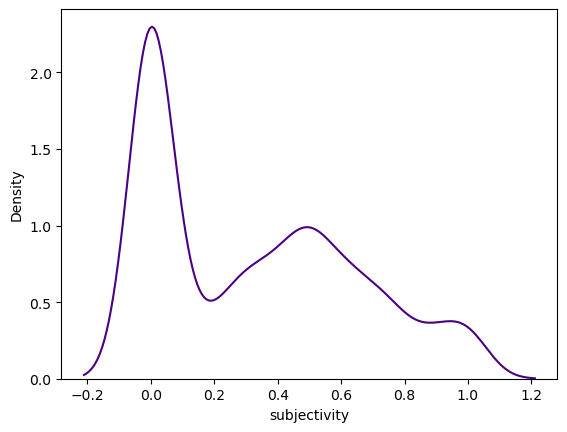

In [12]:
sns.kdeplot(df.subjectivity,color='indigo');

In [13]:
#defining the function named as score analysis,here based on polarity finding the reviews
def analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

#creating the new column by applying on function on polarity
df['review'] = df['polarity'].apply(analysis)

<AxesSubplot:xlabel='review', ylabel='count'>

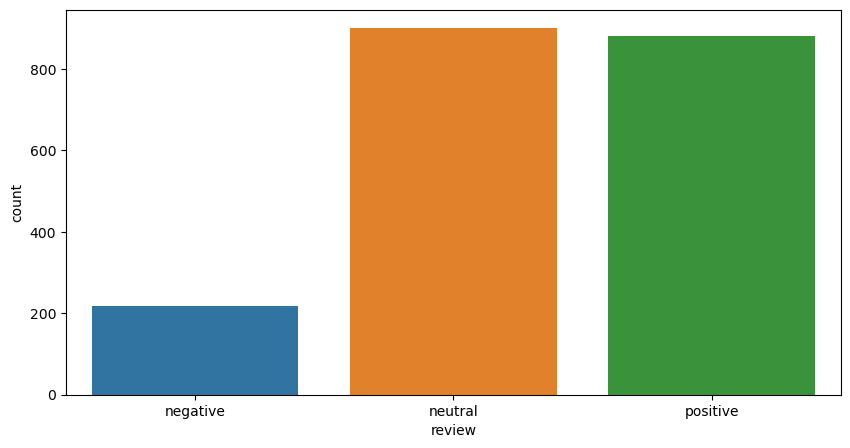

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='review',data=df)

In [16]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

In [17]:
#reading the stop words using pandas
stopwords=pd.read_csv('stop.txt')


In [18]:
#applying the stopwords for text and segrigating them
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [19]:
#while importing the stop words i have missed 'a'
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in 'a'))

In [20]:
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts() # for top 20
freq_Sw

the         487
to          400
is          355
of          315
spacex      239
           ... 
nyquil        1
musk          1
negati        1
carousel      1
altho         1
Length: 4604, dtype: int64

In [21]:
#datasets
df

,Text,subjectivity,polarity,review
0,im an alien,0.750000,-0.250000,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000000,neutral
2,joerogan spotify great interview,0.750000,0.800000,positive
3,doge is underestimated,0.000000,0.000000,neutral
4,teslacn congratulations tesla china for amazin...,0.366667,0.275000,positive
...,...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.508333,0.111111,positive
1995,ppathole make sure to read ur terms amp condit...,0.888889,0.500000,positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,neutral
1997,ppathole altho dumb and dumber is,0.500000,-0.375000,negative


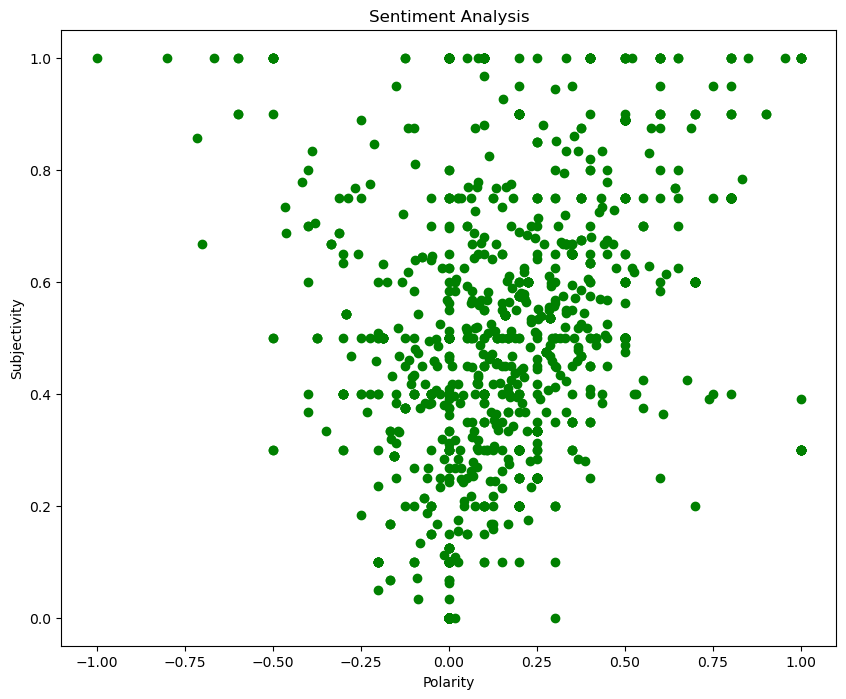

In [22]:
#ploting scatter plot based on polarity and subjectivity
plt.figure(figsize=(10, 8))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df["subjectivity"][i], color = "green")
plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [23]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
#based on occurence distributing the frequency
word_freq_df

,term,occurrences,frequency
0,aber,1,0.000157
1,abo,1,0.000157
2,aboard,1,0.000157
3,abort,3,0.000472
4,above,5,0.000787
...,...,...,...
4031,zshauladventure,1,0.000157
4032,zubinanary,1,0.000157
4033,zwiebelbach,1,0.000157
4034,zzcool,1,0.000157


In [25]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
data

,able,abort,absolutely,absurd,access,accurate,actual,actually,adamklotz,add,...,years,yes,yesterdays,youre,yourfavgas,youve,yup,zero,zeroes,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [28]:
top2_words = get_top_n2_words(df['Text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36
5,to the,28
6,to be,28
7,is the,24
8,should be,22
9,on the,19


In [29]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [30]:
top3_words = get_top_n3_words(df["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [31]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the spacestation,9
3,it will be,8
4,spacex falcon first,8
...,...,...
195,departure burns to,2
196,burns to move,2
197,to move away,2
198,move away from,2


In [32]:
# Applying naive bayes for classification

In [33]:
df.head()

,Text,subjectivity,polarity,review
0,im an alien,0.750000,-0.250,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000,neutral
2,joerogan spotify great interview,0.750000,0.800,positive
3,doge is underestimated,0.000000,0.000,neutral
4,teslacn congratulations tesla china for amazin...,0.366667,0.275,positive


In [34]:
df['review'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [35]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
sentiments_using_SIA = df.Text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Text
pos,1760
neg,239


In [38]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df.Text[3])

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}

In [39]:
df['tweet'] = df['Text']
df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Text,subjectivity,polarity,review,tweet,scores
0,im an alien,0.750000,-0.250,negative,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000,neutral,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,0.750000,0.800,positive,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,doge is underestimated,0.000000,0.000,neutral,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china for amazin...,0.366667,0.275,positive,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [40]:
df=df.drop(['Text','polarity','review'],axis=1)

In [41]:
df=df.drop('subjectivity',axis=1)

In [42]:
df.head()

,tweet,scores
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [43]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,tweet,scores,compound
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271


In [44]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,tweet,scores,compound,sentiment
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,Positive
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271,Positive
...,...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,"{'neg': 0.241, 'neu': 0.575, 'pos': 0.184, 'co...",-0.4215,Negative
1995,ppathole make sure to read ur terms amp condit...,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.5994,Positive
1996,teslagong ppathole samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1997,ppathole altho dumb and dumber is,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",-0.7003,Negative


<AxesSubplot:xlabel='compound', ylabel='Count'>

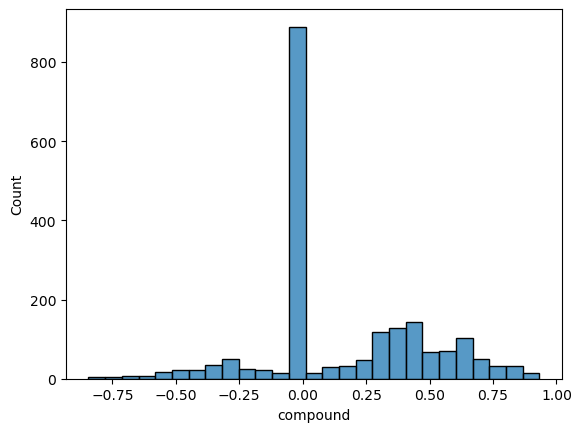

In [45]:
sns.histplot(df.compound)

In [46]:
temp = df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp

,sentiment,tweet
1,Neutral,894
2,Positive,871
0,Negative,234


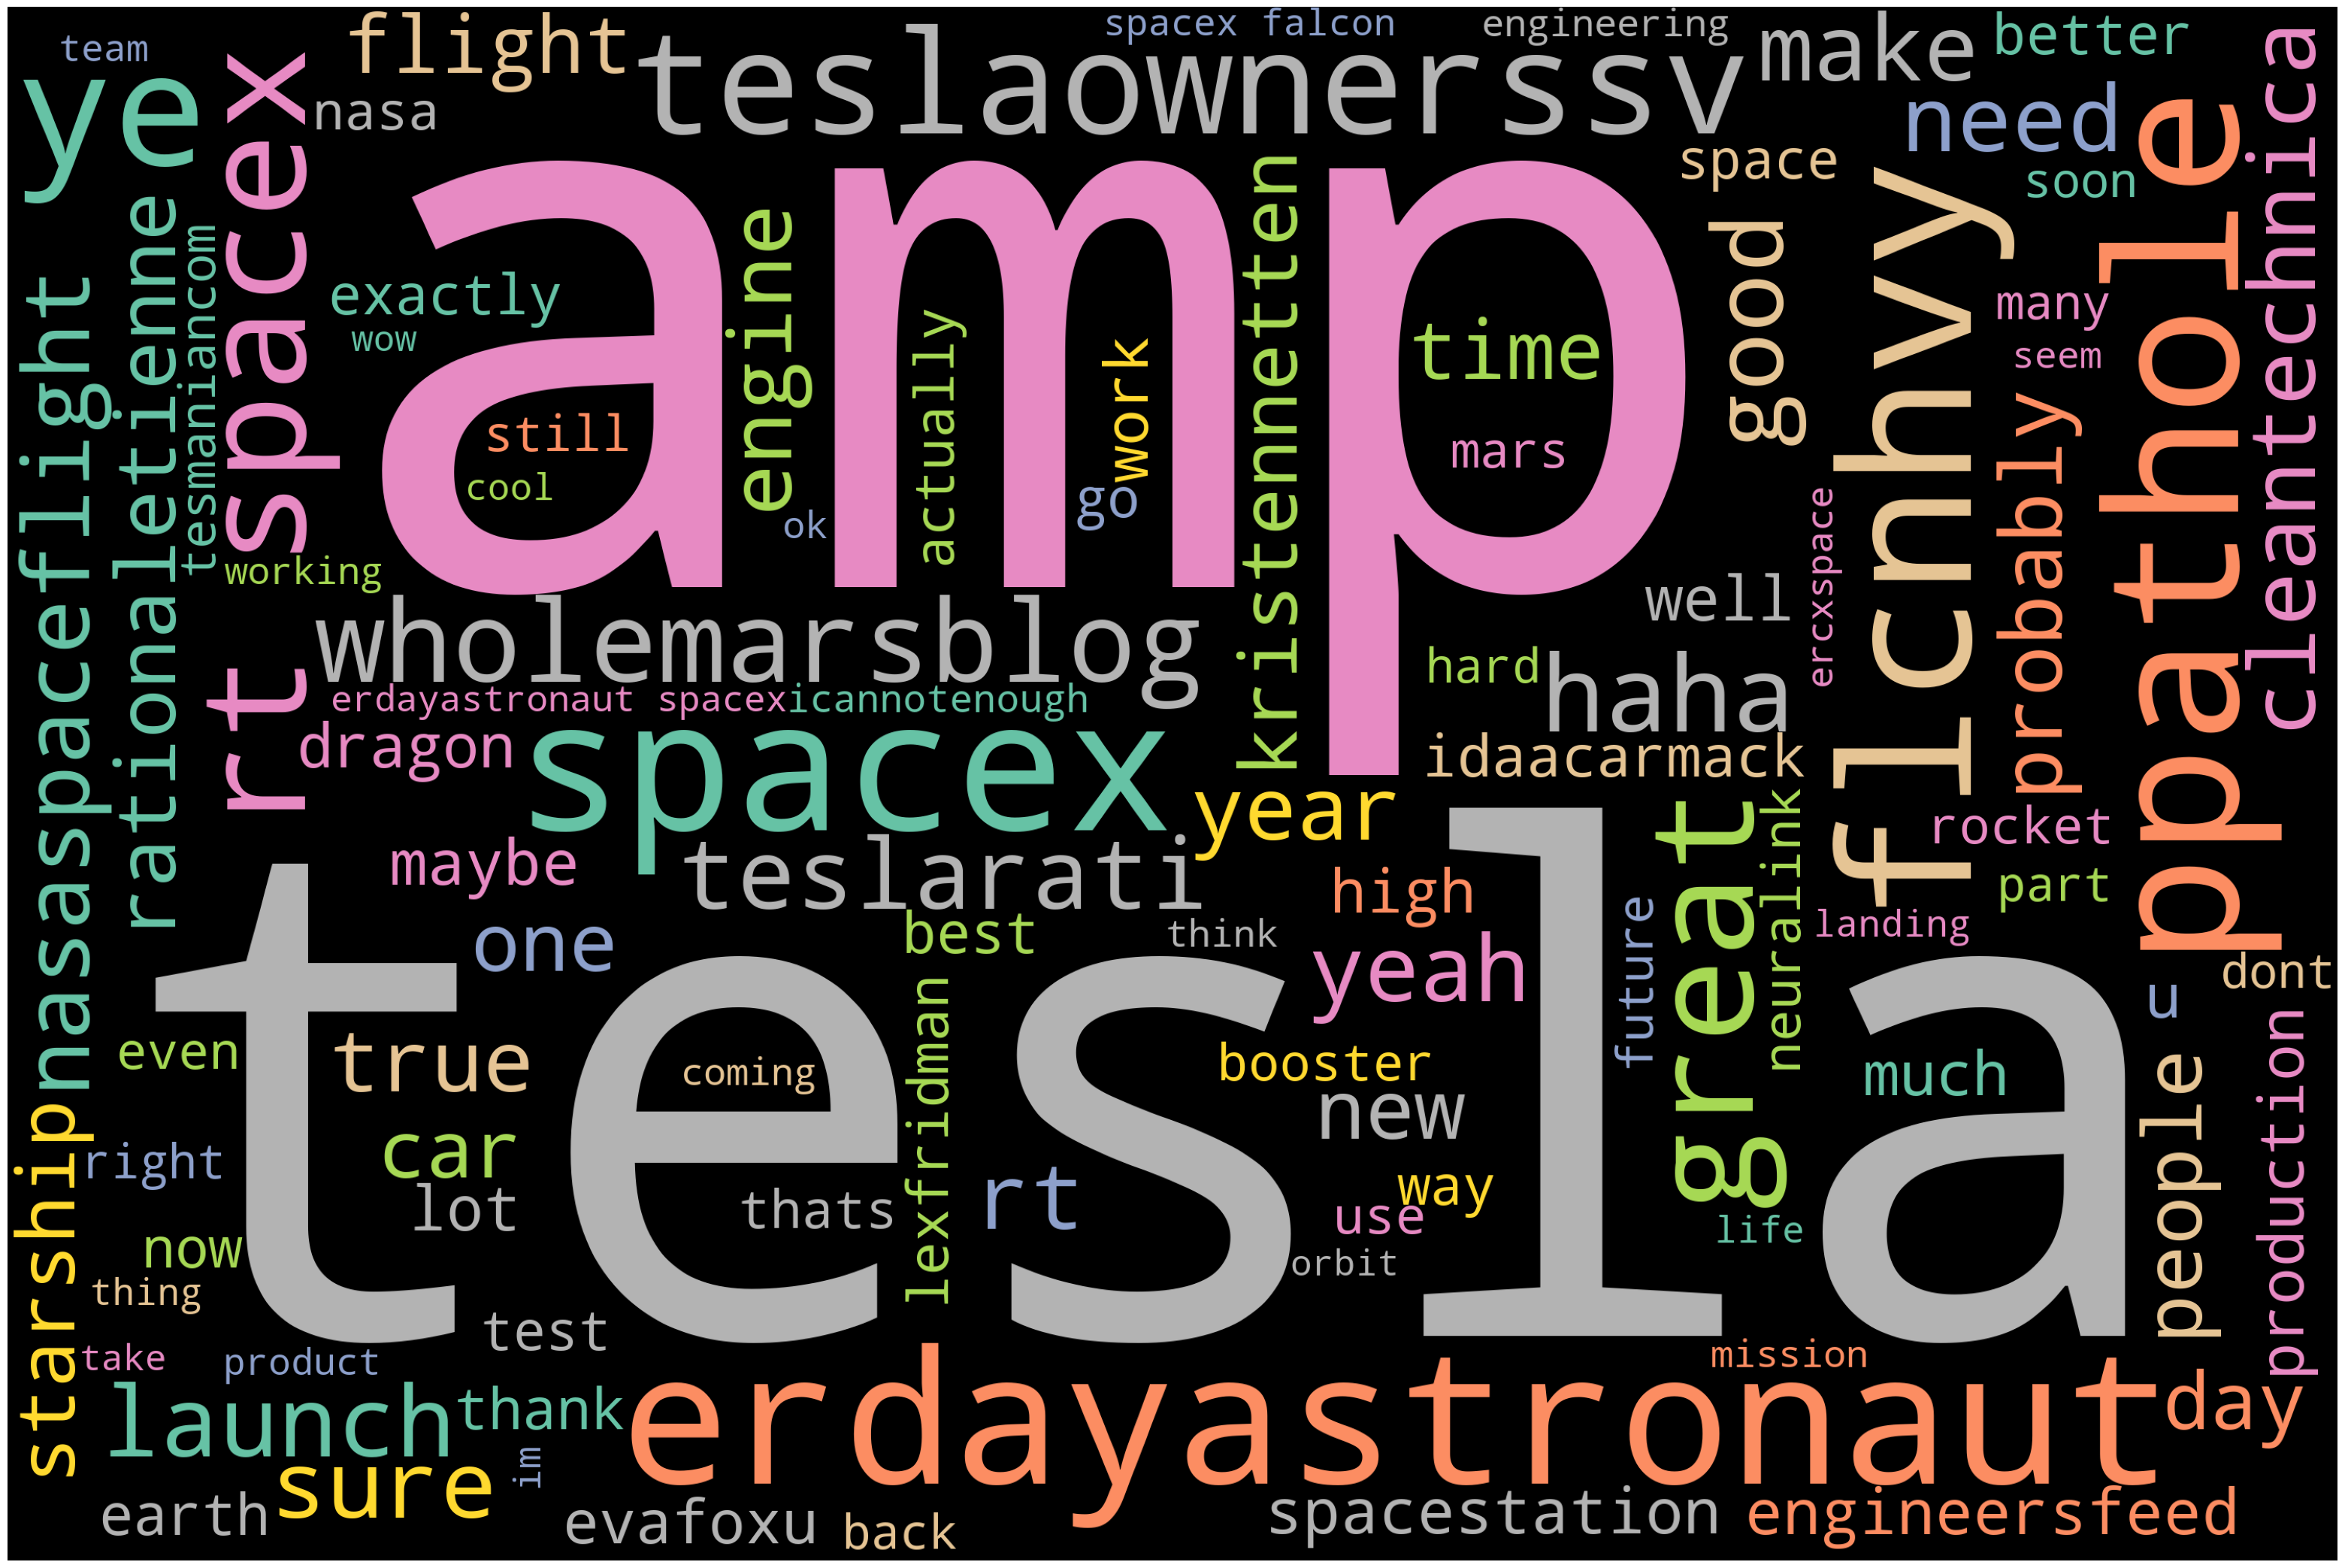

In [47]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Generate wordcloud
# Joining the list into one string/text
text = ' '.join(df.tweet)
text
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

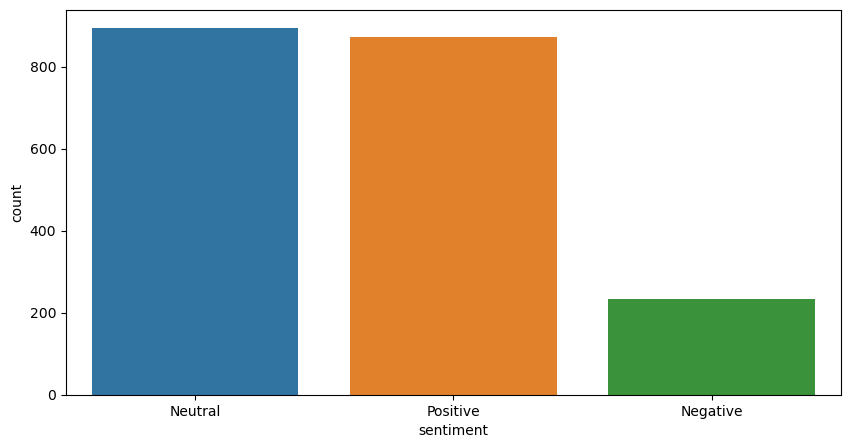

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment',data=df)

In [49]:
def split_into_words(i):
    return (i.split(" "))

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0],df.iloc[:,-1],test_size=0.2,random_state=42)

In [51]:
X_test

256                                   connectdotstoo sure
352     flcnhvy ercxspace saves mass amp cost of legs ...
298                 techreview and increase fun hopefully
581                               xhnews exciting mission
1288    flcnhvy gary the snail is still winning but we...
                              ...                        
650     nichegamer there is such thing as too much sen...
1973                                  optimoprincipi spqr
261     arstechnica sciguyspace were just trying to ge...
1305    starship with flaps amp nosecone should be don...
966     the gauntlet has been thrown down the prophecy...
Name: tweet, Length: 400, dtype: object

In [52]:
# Preparing email texts into word count matrix format 
tweet= CountVectorizer(analyzer=split_into_words).fit(df.tweet)

In [53]:
all_tweet_matrix = tweet.transform(df.tweet)
all_tweet_matrix.shape 

(1999, 4605)

In [54]:
# For training messages
train_tweet_matrix = tweet.transform(X_train)
train_tweet_matrix.shape 

# For testing messages
test_tweet_matrix = tweet.transform(X_test)
test_tweet_matrix.shape 

(400, 4605)

In [55]:
from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tweet_matrix,y_train)


test_pred_m = classifier_mb.predict(test_tweet_matrix)
accuracy_test_m = np.mean(test_pred_m==y_test) 
print('testing accuracy of model :',accuracy_test_m)




testing accuracy of model : 0.7075
